In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
##### Reading allele frequencies for whole genome #####

def fix_freqs(freqs):
    common_n = 0
    freqs = freqs.split(",")
    for freq in freqs:
        freq = freq.split(":")
        if float(freq[1]) > 0.01:
            common_n += 1
    return common_n

whole_genome_df = pd.DataFrame(columns = ['chrom','start','end','afreq','n_common'])

for i in range(1,23):
    df = pd.read_csv(f"/expanse/projects/gymreklab/helia/ensembl/experiments/allele_freq/freqs/freqs_chr{i}.tab", 
                     sep="\t")
    df = df[['chrom','start','end','afreq']]
    df['n_common'] = df.apply(lambda row : fix_freqs(row['afreq']), axis = 1)
    whole_genome_df = pd.concat([df,whole_genome_df])

whole_genome_df = whole_genome_df.drop_duplicates(keep="first", subset=['chrom','start','end'])
whole_genome_df['end'] = whole_genome_df['end'] - 1

In [4]:
##### Subsetting allele frequencing for overlap with coding regions #####
coding_regions = pd.read_csv("TR_intersect.txt",sep="\t", header=None)
coding_regions.columns = ['chrom','start','end']
coding_regions_df = pd.merge(coding_regions, whole_genome_df, on = ['chrom','start','end'])
coding_regions_df

,chrom,start,end,afreq,n_common
0,chr1,960770,960798,"2.6666666666666665:0.001,9.666666666666666:0.999",1
1,chr1,970841,970857,8.5:1.000,1
2,chr1,976178,976199,"3.6666666666666665:1.000,4.666666666666667:0.000",1
3,chr1,1232633,1232644,4.0:1.000,1
4,chr1,1232807,1232818,"1.0:0.001,2.0:0.000,3.0:0.000,4.0:0.999",1
...,...,...,...,...,...
6069,chr22,50603316,50603361,"14.333333333333334:0.000,15.333333333333334:0....",1
6070,chr22,50604149,50604160,"1.0:0.000,4.0:1.000",1
6071,chr22,50604544,50604573,6.0:1.000,1
6072,chr22,50604546,50604557,4.0:1.000,1


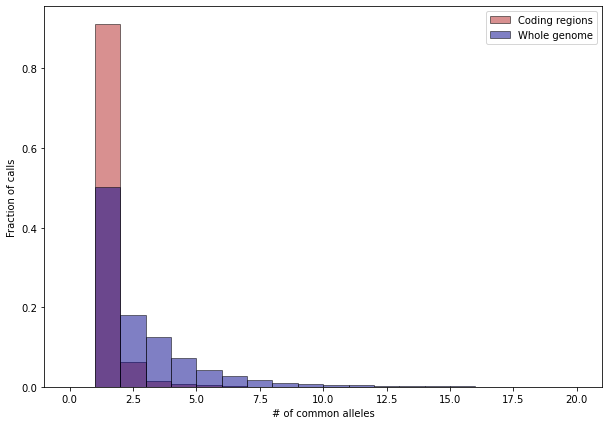

In [6]:
max_range = 20
plt.figure(figsize=(10,7))
plt.hist(coding_regions_df['n_common'], bins=max_range, density=True, \
         range = (0,max_range), alpha = 0.5, edgecolor = "black", color='firebrick', label="Coding regions")
plt.hist(whole_genome_df['n_common'], bins=max_range, density = True, \
         range = (0,max_range), alpha = 0.5, edgecolor = "black", color='darkblue', label = "Whole genome" )
plt.xlabel("# of common alleles")
plt.ylabel("Fraction of calls")
plt.legend()
plt.savefig("pdfs/coding_polymorphism.pdf", dpi=1200)